In [2]:
import numpy as np
import matplotlib.pyplot as plt

(3283000,)


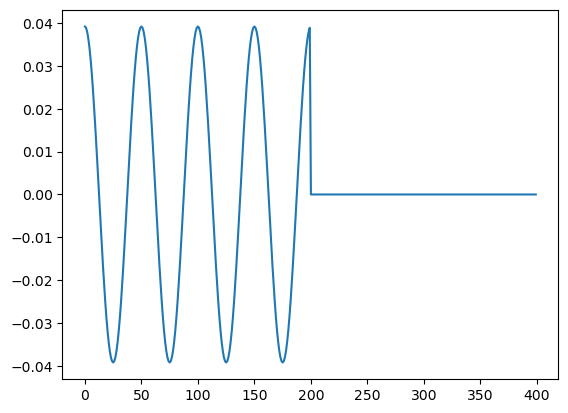

In [28]:
raw_data = np.fromfile("flag.raw",dtype=np.float32)
print(raw_data.shape)
plt.plot(raw_data[2600:3000])

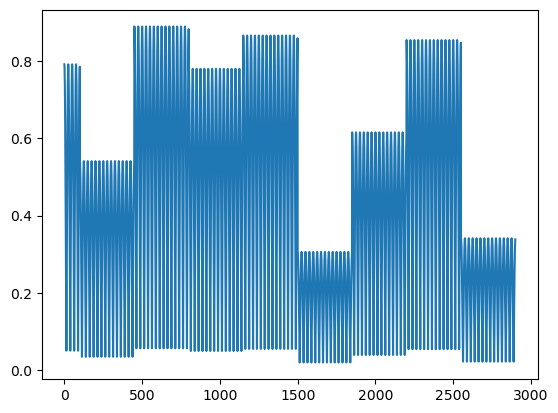

In [30]:
raw_data = abs(raw_data)
plt.plot(raw_data[int(0.5e6)+1100: int(0.5e6) + 4000])

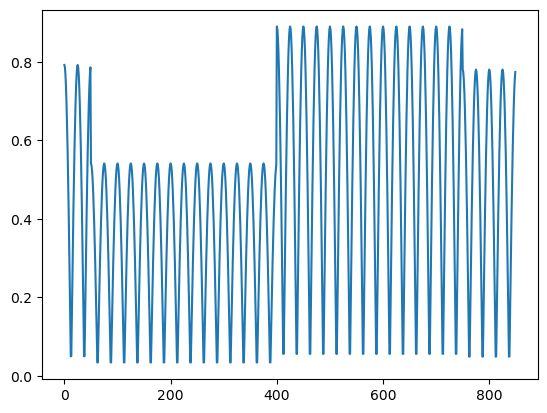

In [34]:
plt.plot(raw_data[int(0.5e6)+1150: int(0.5e6) + 2000])


In [37]:
START = int(0.5e6)+1150
END = int(0.5e6)+1700
for i in range(START, END):
    if raw_data[i] >= 0.6:
        print(f"{i}: {raw_data[i]}")

501150: 0.7921568751335144
501151: 0.7859104871749878
501152: 0.7672697901725769
501153: 0.7365288138389587
501154: 0.6941723227500916
501155: 0.6408683657646179
501170: 0.6408683657646179
501171: 0.6941723227500916
501172: 0.7365288138389587
501173: 0.7672697901725769
501174: 0.7859104871749878
501175: 0.7921568751335144
501176: 0.7859104871749878
501177: 0.7672697901725769
501178: 0.7365288138389587
501179: 0.6941723227500916
501180: 0.6408683657646179
501195: 0.6408683657646179
501196: 0.6941723227500916
501197: 0.7365288138389587
501198: 0.7672697901725769
501199: 0.7859104871749878
501550: 0.8901960849761963
501551: 0.8831766247749329
501552: 0.8622289299964905
501553: 0.8276833891868591
501554: 0.7800847887992859
501555: 0.7201837301254272
501556: 0.6489250063896179
501569: 0.6489250063896179
501570: 0.7201837301254272
501571: 0.7800847887992859
501572: 0.8276833891868591
501573: 0.8622289299964905
501574: 0.8831766247749329
501575: 0.8901960849761963
501576: 0.8831766247749329
5

In [42]:
BLOCK_SIZE = 350 # sample rate/debit

cut in 350 samples block, get max then check the max of the max, and divide it by 256, in order to slice heights

In [43]:
max_blocks = []
for i in range(0, len(raw_data), BLOCK_SIZE):
    max_blocks.append(max(raw_data[i:i+BLOCK_SIZE]))
print(len(max_blocks))

9380


In [62]:
valence = 256
step = max(max_blocks)/256
print(step)

0.00390625


In [63]:
out = []
for m in max_blocks:
    out.append(int(m//(step+0.000001)))

In [64]:
png_data = bytes(out)

In [65]:
f = open("flag.png", 'wb')
f.write(png_data)
f.close()